<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
**a) Luminosity function** Define the luminosity function as
\begin{equation}
\mathrm dN=\phi(M_V)\mathrm dM_V
\end{equation}
where N is the number of stars per cubic pc in absolute magnitude $[M_V, M_V+\mathrm dM_V]$.

In [50]:
import numpy as np
'''read catalog file'''
m, p = np.loadtxt('hp_main.dat', delimiter='|', usecols=(5,11), unpack=True, dtype='str')

Here I set the distance$<500pc$

In [118]:
'''transforme the data to array'''
plx_min = 2 #under limit of parallax
tot = 0
parallax = []
magnitude = []
for i in range(len(p)):
    if p[i] != '       ' and m[i] != '     ':
        plx = float(p[i])
        if plx > plx_min:
            magnitude.append(float(m[i]))
            parallax.append(plx)
            tot += 1
magnitude = np.array(magnitude)
parallax = np.array(parallax)
distance = 1000 / parallax
M_V = magnitude - 5 * np.log10(distance / 10)

'''obtain luminosity function as table and histogram'''
Mlist = range(-4, 14)
Mdistri = []
M_V = M_V.round()
M_V = M_V.tolist()
for M in Mlist:
    Mdistri.append(M_V.count(M))
Mdistri = np.array(Mdistri)

Here I interpolate the table 1 in the paper to modify the fraction of post-MS stars. The V magnitude of MS should $M_V<13$. 

In [119]:
f = (0.175, 0.365, 0.495, 0.47, 0.415, 0.5, 0.65, 0.8, 0.95, 1,1,1,1,1,1,1,1,1)
N = Mdistri / ( 4 / 3 * np.pi * (1000/plx_min)**3) / 1 * f
for i, M in enumerate(Mlist):
    print('|%d|%3.2f|'%(M, np.log10(N[i])+10))

|-4|2.26|
|-3|3.11|
|-2|3.86|
|-1|4.52|
|0|4.97|
|1|5.31|
|2|5.37|
|3|5.39|
|4|5.32|
|5|5.02|
|6|4.68|
|7|4.48|
|8|4.27|
|9|3.96|
|10|3.72|
|11|3.37|
|12|3.00|
|13|2.51|


**Here is the luminosity function**

|$M_V$|$\log\phi+10$|
|----|----|
|-4|2.26|
|-3|3.11|
|-2|3.86|
|-1|4.52|
|0|4.97|
|1|5.31|
|2|5.37|
|3|5.39|
|4|5.32|
|5|5.02|
|6|4.68|
|7|4.48|
|8|4.27|
|9|3.96|
|10|3.72|
|11|3.37|
|12|3.00|
|13|2.51|


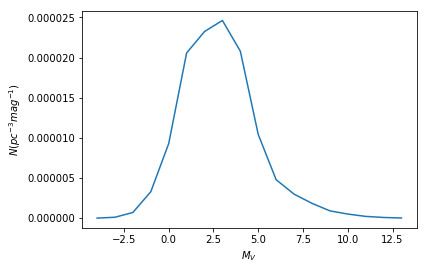

In [124]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Mlist, N)
plt.xlabel('$M_V$')
plt.ylabel('$N(pc^{-3}mag^{-1})$')
plt.show()

Above is the plot of luminosity function.

**b)** Use the following mass-luminosity relation:
\begin{eqnarray}
\frac{L}{L_\odot}&=&0.23\left(\frac{M}{M_\odot}\right)^{2.3}\qquad(M_\odot<M<0.43M_\odot)\\
\frac{L}{L_\odot}&=&\left(\frac{M}{M_\odot}\right)^4\qquad(0.43M_\odot<M<2M_\odot)\\
\frac{L}{L_\odot}&=&1.5\left(\frac{M}{M_\odot}\right)^{3.5}\qquad(2M_\odot<M<20M_\odot)
\end{eqnarray}

In [150]:
masslist = []
for M in np.arange(-4.5, 14.5, 1):
    m = (10**(0.4 * (4.83-M)))**(1/4)
    if m > 0.43 and m <= 2:
        masslist.append(m)
    else:
        m = (10**(0.4 * (4.83-M)) / 1.5)**(1/3.5)
        if m > 2 and m < 20:
            masslist.append(m)
        else:
            m = (10**(0.4 * (4.83-M)) / 0.23)**(1/2.3)
            masslist.append(m)

dmass = []#bin width
cmass = []#bin center
for i in range(len(masslist)-1):
    dmass.append(masslist[i]-masslist[i+1])
    cmass.append((masslist[i]+masslist[i+1])/2)
dmass = np.array(dmass)
cmass = np.array(cmass)
N_mass = N / dmass
for i in range(len(cmass)):
    print('|%3.2f|%3.2f|'%(cmass[i],np.log10(N[i])+10))


|9.17|2.26|
|7.05|3.11|
|5.42|3.86|
|4.17|4.52|
|3.20|4.97|
|2.46|5.31|
|1.92|5.37|
|1.53|5.39|
|1.22|5.32|
|0.97|5.02|
|0.77|4.68|
|0.61|4.48|
|0.49|4.27|
|0.36|3.96|
|0.24|3.72|
|0.16|3.37|
|0.11|3.00|
|0.07|2.51|


**Present-day mass function** ($\phi$ is the number of star in this bin per pc. The mass bin is **not** linear here.)

|mass($M_\odot$)|$\log\phi+10$
|:--------:|:--------:|
|9.17|2.26|
|7.05|3.11|
|5.42|3.86|
|4.17|4.52|
|3.20|4.97|
|2.46|5.31|
|1.92|5.37|
|1.53|5.39|
|1.22|5.32|
|0.97|5.02|
|0.77|4.68|
|0.61|4.48|
|0.49|4.27|
|0.36|3.96|
|0.24|3.72|
|0.16|3.37|
|0.11|3.00|
|0.07|2.51|

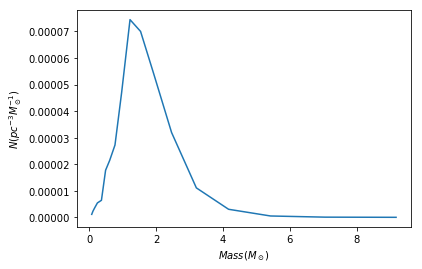

In [157]:
plt.figure()
plt.plot(cmass,N_mass)
plt.xlabel('$Mass(M_\odot)$')
plt.ylabel('$N(pc^{-3}M_\odot^{-1})$')
plt.show()

**c)** Massive stars have shorter lifetime. Under constant star formation rate, the ratio of massive stars is relatively smaller, which need to be corrected.
\begin{equation}
IMF\propto \frac{PMF}{lifetime}
\end{equation}

And the lifetime
\begin{equation}
\tau\propto \left(\frac{M}{M_\odot}\right)^{-2.5}
\end{equation}
Then the IMF should be normalized.

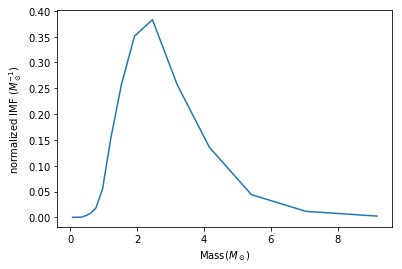

In [175]:
IMF_mass = N_mass * cmass**2.5
s = IMF_mass * dmass
IMF_mass = IMF_mass / s.sum()
plt.figure()
plt.plot(cmass, IMF_mass)
plt.xlabel('Mass($M_\odot$)')
plt.ylabel('normalized IMF ($M_\odot^{-1}$)')
plt.show()

This is the initial mass function.